<a href="https://colab.research.google.com/github/soyudea/StrokePredictionModel/blob/main/01_Exploraci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Librerías usadas en el Proyectos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
import seaborn as sns
from pandas.plotting import scatter_matrix

https://www.kaggle.com/competitions/playground-series-s3e2/data?select=train.csv

**1. Carga del dataset**

In [ ]:
#Se carga dataset obtenido de Kaggle de competencia “Playground Series - Season 3, Episode 2” 
#disponible en el siguiente enlace: https://www.kaggle.com/competitions/playground-series-s3e2/ 

datos = pd.read_csv('train.csv', sep=",")
df =datos.copy()


**2. Visualizando el dataset**

In [ ]:
#Apariencia de la tabla de datos
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [ ]:
#Número de muestras (filas) y caracteristicas incluyendo variable de salida (columnas)
df.shape


(15304, 12)

In [ ]:
#Tipos de datos de cada columna
df.dtypes


id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

**3. Exploración descriptiva del dataset**

In [ ]:
# Tipos de cada columna y cantidad de nulos
# ==============================================================================
# En pandas, el tipo "object" hace referencia a strings
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [ ]:
#Dataset original no incluye valores nulos para efectos académicos se ingresarn algunos valores en 
#dos caracteristicas (age y avg_glucose_level)

lista=[]
porc_nulos =int(np.shape(df)[0]*5/100)   #Calculo de porcentaje de datos nulos
rango_df = np.shape(df)[0]

for i in range(porc_nulos):
    num_aleatprio = np.random.randint(rango_df) 
    lista.append(num_aleatprio)


for i in lista:
    df.at[i, "age"] = np.nan

lista=[]
rango_df = np.shape(df)[0]

for i in range(porc_nulos):
    num_aleatprio = np.random.randint(rango_df) 
    lista.append(num_aleatprio)


for i in lista:
    df.at[i, "avg_glucose_level"] = np.nan

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                14556 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  14552 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                  748
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level    752
bmi                    0
smoking_status         0
stroke                 0
dtype: int64

**3.1 Descripción variables numéricas**

In [ ]:
df.describe()[['age','avg_glucose_level','bmi']]

,age,avg_glucose_level,bmi
count,14556.000000,14552.000000,15304.000000
mean,41.419434,88.972986,28.112721
std,21.455531,25.480286,6.722315
min,0.080000,55.220000,10.300000
25%,25.000000,74.817500,23.500000
50%,43.000000,85.070000,27.600000
75%,57.000000,96.920000,32.000000
max,82.000000,267.600000,80.100000


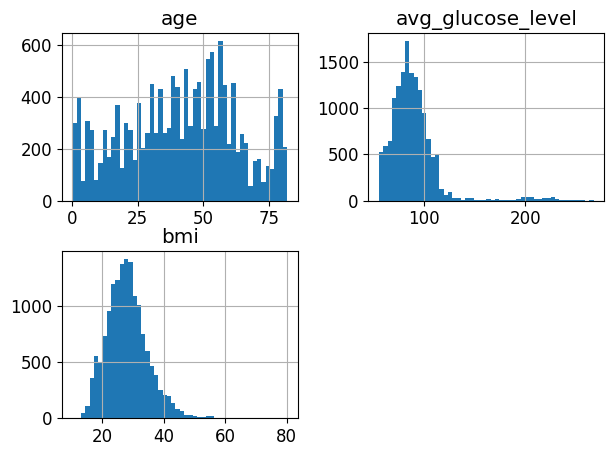

In [ ]:
df_numeric=df[['age','avg_glucose_level','bmi']]
df_numeric.hist(figsize=(7,5),bins=50)
plt.show()

<Axes: xlabel='age', ylabel='Count'>

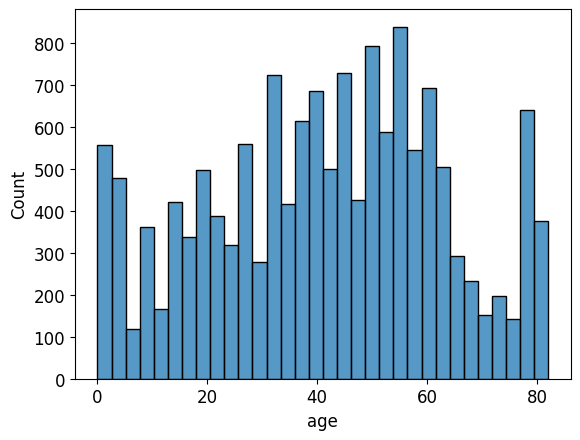

In [ ]:
sns.histplot(data=df, x='age')


<Axes: ylabel='Nivel de glucosa en sangre (mg/dl)'>

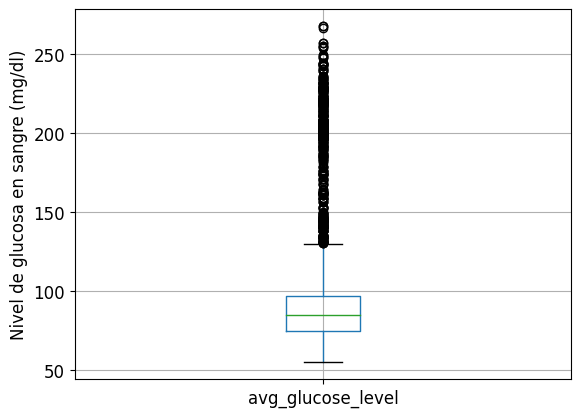

In [ ]:
#Para visualizar distrubución de los datos, simetria y datos atipicos se usan boxplot para variables numéricas
df.boxplot(column="avg_glucose_level", ylabel="Nivel de glucosa en sangre (mg/dl)")

**3.2 Cuantificación de variables categóricas**

In [ ]:
# Para contabilizar variables categóricas:
df["gender"].value_counts()

Female    9446
Male      5857
Other        1
Name: gender, dtype: int64

<Axes: title={'center': 'Distrubución por tipo de trabajo'}, ylabel='work_type'>

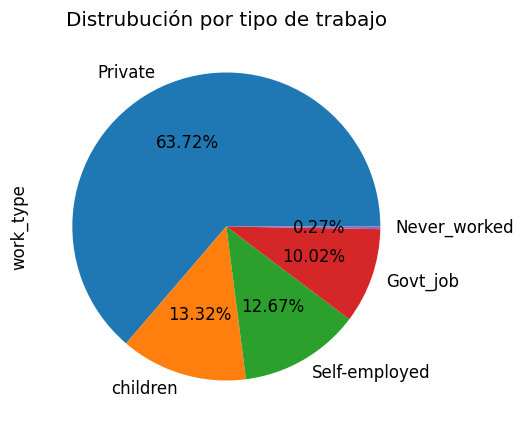

In [ ]:
work_type = df["work_type"].value_counts()
work_type.plot(kind = "pie", title="Distrubución por tipo de trabajo", autopct='%1.2f%%', figsize=(5,5))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                14556 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  14552 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [ ]:
df["Residence_type"].value_counts()

Rural    7664
Urban    7640
Name: Residence_type, dtype: int64

In [ ]:
df["smoking_status"].value_counts()

never smoked       6281
Unknown            4543
formerly smoked    2337
smokes             2143
Name: smoking_status, dtype: int64

<Axes: xlabel='age', ylabel='gender'>

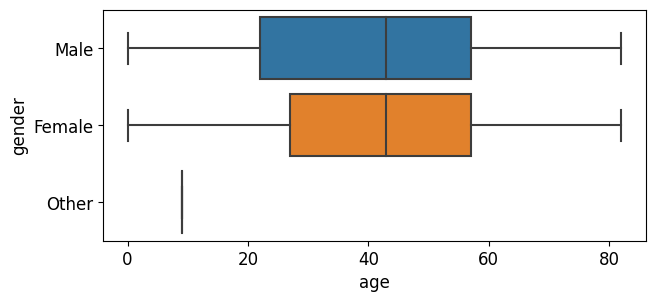

In [ ]:
# Se pueden relacionar variables categóricas con variables numéricas
plt.figure(figsize=(7,3))
sns.boxplot(x="age", y="gender", data=df)

**4. Análisis de la variable Objetivo** **"Stroke"**

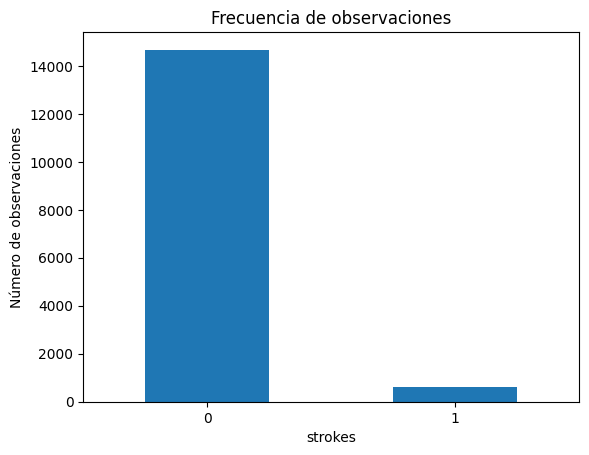

In [ ]:
cantidad_clases = datos.value_counts(datos['stroke'], sort = True)
cantidad_clases.plot(kind = 'bar', rot=0)
plt.title("Frecuencia de observaciones")
plt.xlabel("strokes")
plt.ylabel("Número de observaciones");

Observación:
**Se observa una base de datos muy desbalanceada, algo normal en bases de datos relacionadas a temas de salud.**

**La variable objetivo tiene un número alto de valores de la clase "0", muy pocos en la clase "1".**

**5. Corelación variables**

<ipython-input-95-900409e25e8d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_p = df.corr()
<ipython-input-95-900409e25e8d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_k = df.corr(method = "kendall")
<ipython-input-95-900409e25e8d>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_s = df.corr(method = "spearman")


<Axes: >

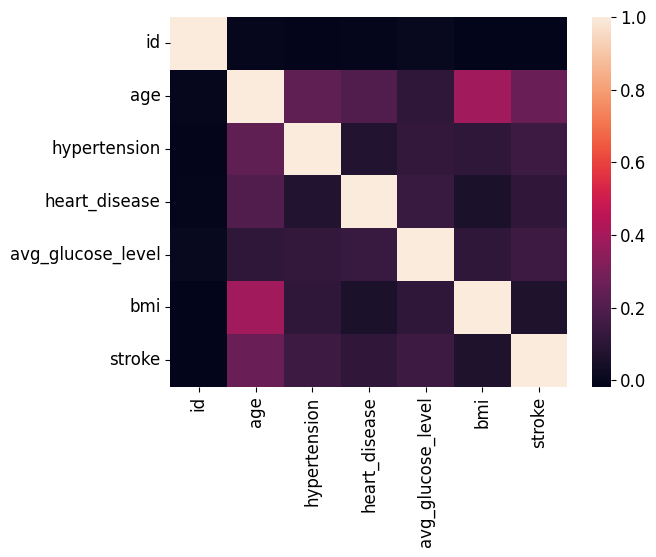

In [ ]:
#Posible correlación entre variables
corr_p = df.corr()
corr_k = df.corr(method = "kendall")
corr_s = df.corr(method = "spearman")

sns.heatmap(corr_p)

In [ ]:
corr_p["stroke"].sort_values(ascending=False)

stroke               1.000000
age                  0.260691
hypertension         0.145895
avg_glucose_level    0.144669
heart_disease        0.111518
bmi                  0.065393
id                  -0.017290
Name: stroke, dtype: float64

In [ ]:
corr_k["stroke"].sort_values(ascending=False)

stroke               1.000000
age                  0.211460
hypertension         0.145895
heart_disease        0.111518
bmi                  0.061522
avg_glucose_level    0.040415
id                  -0.014118
Name: stroke, dtype: float64

In [ ]:
corr_s["stroke"].sort_values(ascending=False)

stroke               1.000000
age                  0.257185
hypertension         0.145895
heart_disease        0.111518
bmi                  0.075166
avg_glucose_level    0.049485
id                  -0.017290
Name: stroke, dtype: float64

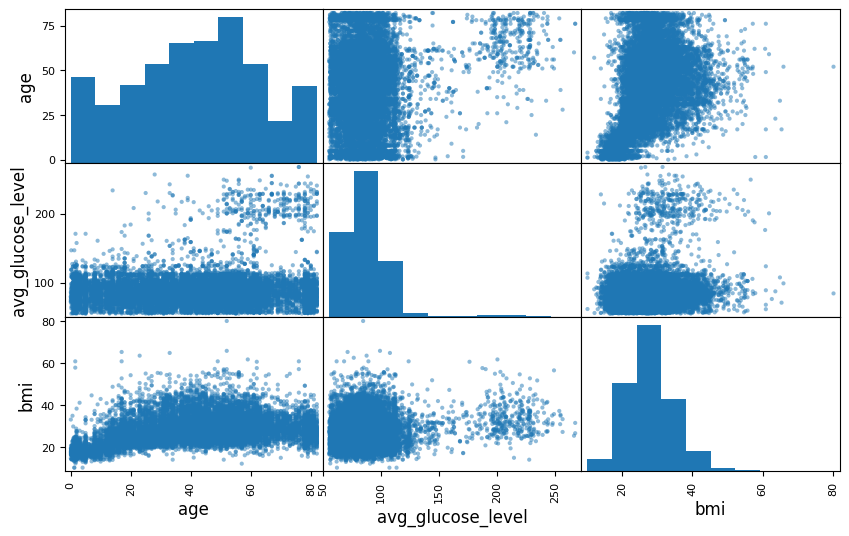

In [ ]:
attributes = ['age','avg_glucose_level','bmi']
scatter_matrix(df[attributes], figsize=(10,6))
plt.show()

Se identifica que variables numéricas tienen una baja correlación con la variable objetivo

**Relación entre la variable age y stroke**

Donde se observa que hay más incidencia de un ataque cardiaco en relación con la edad.

<ipython-input-11-529381819e24>:4: RuntimeWarning: invalid value encountered in long_scalars
  rate.append(df[Age < i]['stroke'].sum() / len(df[Age < i]['stroke']) * 100.0)


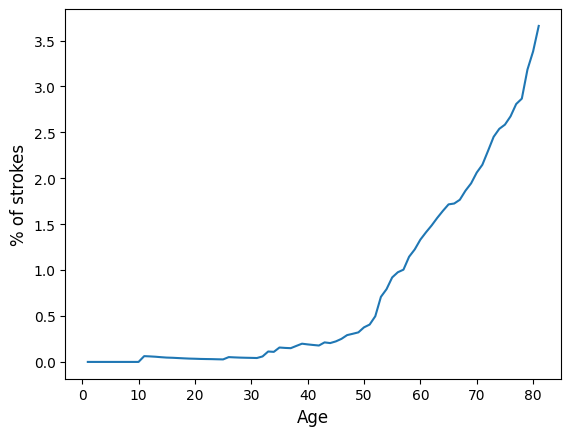

In [ ]:
Age = datos['age'].astype('int')
rate = []
for i in range(Age.min(), Age.max()):
      rate.append(df[Age < i]['stroke'].sum() / len(df[Age < i]['stroke']) * 100.0)
plt.plot(rate)
plt.xlabel('Age', fontsize=12)
plt.ylabel('% of strokes', fontsize=12)
plt.show()      

**Relación entre indice de masa corporal "bmi" y la variable objetivo "Stroke"**

Se observa que al aumentar el bmi aumenta rápidamente la incidencia de ataque cardiaco.

<ipython-input-12-0cdb257ac5c0>:4: RuntimeWarning: invalid value encountered in long_scalars
  rate.append(df[bmi < i]['stroke'].sum() / len(df[bmi < i]['stroke']) * 100.0)


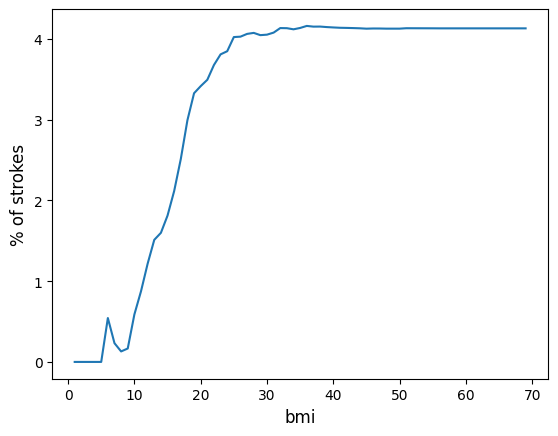

In [ ]:
bmi = datos['bmi'].astype(int)
rate = []
for i in range(bmi.min(), bmi.max()):
    rate.append(df[bmi < i]['stroke'].sum() / len(df[bmi < i]['stroke']) * 100.0)
plt.plot(rate)
plt.xlabel('bmi', fontsize=12)
plt.ylabel('% of strokes', fontsize=12)
plt.show()

**Relación del nivel de glucosa en sangre con el ataque cardiaco**

<ipython-input-13-6b171b5b7504>:4: RuntimeWarning: invalid value encountered in long_scalars
  rate.append(df[glucosa < i]['stroke'].sum() / len(df[glucosa < i]['stroke']) * 100.0)


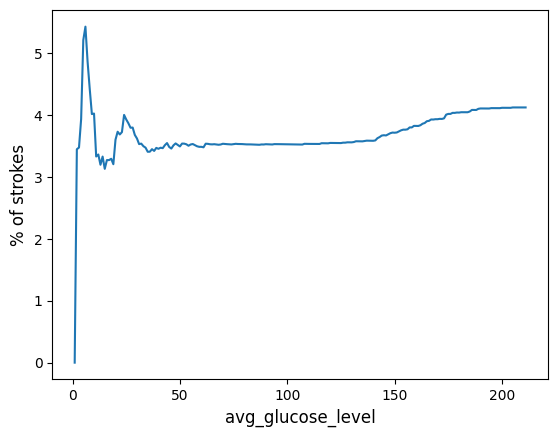

In [ ]:
glucosa = datos['avg_glucose_level'].astype(int)
rate = []
for i in range(glucosa.min(), glucosa.max()):
    rate.append(df[glucosa < i]['stroke'].sum() / len(df[glucosa < i]['stroke']) * 100.0)
plt.plot(rate)
plt.xlabel('avg_glucose_level', fontsize=12)
plt.ylabel('% of strokes', fontsize=12)
plt.show()

**Dado que la base de datos no cumpliría con uno de los requisistos de tener 35 caracteristicas o más, se discretiza la variable edad, nivel de glucosa en la sangre, i el indice de masa muscular.**

In [ ]:
#Se transforma campo numerico age a un atributo con valores categoricos, se discretisa
#========================================================================================================================================================
df = datos.copy()

edades = pd.cut(df['age'], bins = [0,10,20,40,np.inf], labels =['niño','joven','adulto','mayor'], include_lowest=True, retbins = True)
df['new_age'] = list(edades[0]) 

glucosa = pd.cut(df['avg_glucose_level'], bins = [0,100,125,np.inf], labels = ['normal', 'prediabetico','diabetico'], include_lowest=True, retbins=True)
df["avg_glucose"] = list(glucosa[0])

im = pd.cut(df['bmi'], bins = [18.5,24.9,25,29.9,np.inf], labels = ['low_weight', 'Healthy_weight','overweight','obesity'], include_lowest=True, retbins=True)
df['bmi_range'] = list(im[0])
df.shape

(15304, 15)